In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
img=data.camera()

def paddingZero(_img,_size):#填充 避免损失边界信息
    h = _img.shape[0]+2*int((_size-1)/2)
    w = _img.shape[1]+2*int((_size-1)/2)
    n = np.zeros((h,w))
    start_0 = int((_size-1)/2)
    end_0 = int((_size-1)/2)+_img.shape[0]
    start_1 = int((_size-1)/2)
    end_1 = int((_size-1)/2)+_img.shape[1]
    n[start_0:end_0,start_1:end_1] = _img
    return n

In [6]:
def mean_filter(img,t_size):
    height=img.shape[0]#图片维度
    width=img.shape[1]
    template = np.ones((t_size,t_size))
    img_padded = paddingZero(img,t_size)

    test = np.zeros_like(img,dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            window = img_padded[i:i+t_size,j:j+t_size]
            window = window * template
            pixel = np.sum(window)/np.sum(template)
            pixel = int(pixel)
            test[i,j]=pixel
    return test

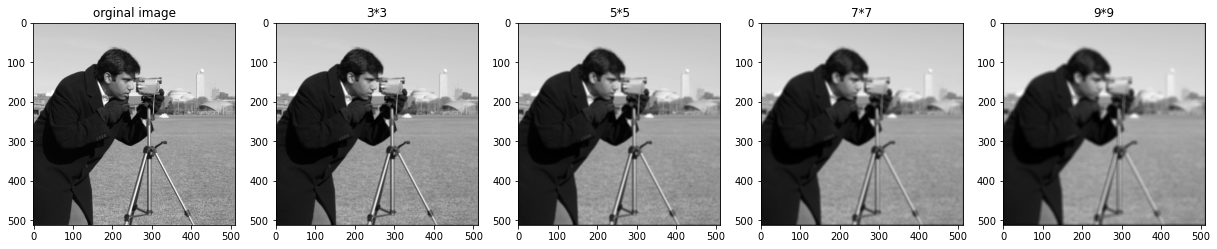

In [7]:
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,5,1)
org.imshow(img,cmap='gray')
org.set_title("orginal image")

test1_img = fig.add_subplot(1,5,2)
test1_img.imshow(mean_filter(img,3),cmap='gray')
test1_img.set_title("3*3")

test2_img = fig.add_subplot(1,5,3)
test2_img.imshow(mean_filter(img,5),cmap='gray')
test2_img.set_title("5*5")

test3_img = fig.add_subplot(1,5,4)
test3_img.imshow(mean_filter(img,7),cmap='gray')
test3_img.set_title("7*7")

test4_img = fig.add_subplot(1,5,5)
test4_img.imshow(mean_filter(img,9),cmap='gray')
test4_img.set_title("9*9")
plt.show()